TASK 1

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image
import io


In [7]:
uploaded = files.upload()


Saving Gg5aNPsbgAAjPrO.jpeg to Gg5aNPsbgAAjPrO.jpeg


In [8]:
def read_uploaded_image():
    for filename in uploaded.keys():
        image = Image.open(io.BytesIO(uploaded[filename]))
        image = np.array(image)
        if image.shape[-1] == 4:  # Convert RGBA to RGB
            image = image[:, :, :3]
        return cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

image = read_uploaded_image()


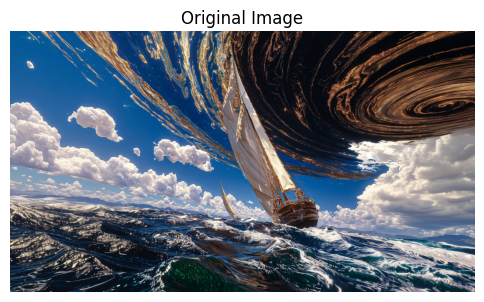

In [9]:
def display_image(image, title="Image", cmap=None):
    plt.figure(figsize=(6,6))
    plt.imshow(image, cmap=cmap)
    plt.title(title)
    plt.axis("off")
    plt.show()

display_image(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), "Original Image")


In [10]:
def get_image_size(image):
    return image.shape

def calculate_pixels(image):
    return image.shape[0] * image.shape[1]

size = get_image_size(image)
pixels = calculate_pixels(image)

print(f"Image Size: {size}")
print(f"Total Pixels: {pixels}")


Image Size: (1632, 2912, 3)
Total Pixels: 4752384


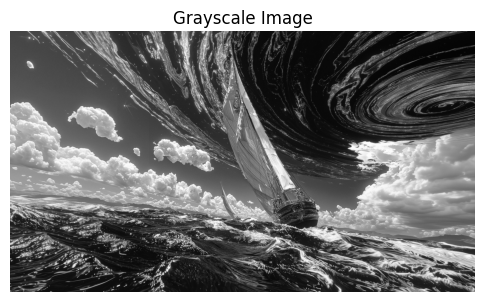

In [11]:
def convert_to_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

grayscale_image = convert_to_grayscale(image)
display_image(grayscale_image, "Grayscale Image", cmap="gray")


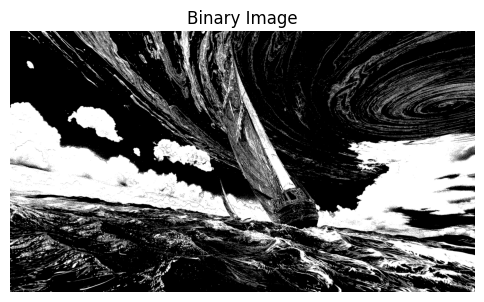

In [12]:
def convert_to_binary(image, threshold=127):
    gray_image = convert_to_grayscale(image)
    _, binary_image = cv2.threshold(gray_image, threshold, 255, cv2.THRESH_BINARY)
    return binary_image

binary_image = convert_to_binary(image)
display_image(binary_image, "Binary Image", cmap="gray")


In [13]:
def count_black_pixels(binary_image):
    return np.sum(binary_image == 0)

black_pixels = count_black_pixels(binary_image)
print(f"Black Pixel Count: {black_pixels}")


Black Pixel Count: 3269456


TASK 2


In [14]:
# Reset image to its original state
image = read_uploaded_image()  # Reload the uploaded image


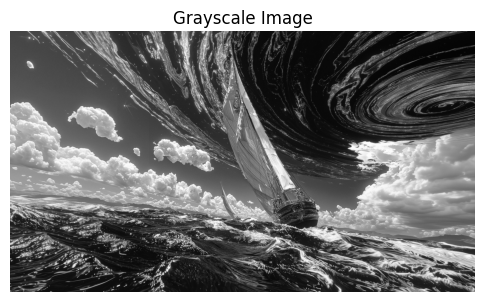

In [15]:
gray_image = convert_to_grayscale(image)
display_image(gray_image, "Grayscale Image", cmap="gray")


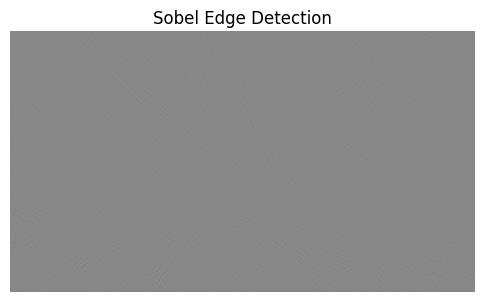

In [16]:
sobel = cv2.Sobel(gray_image, cv2.CV_64F, 1, 1, ksize=5)
display_image(sobel, "Sobel Edge Detection", cmap="gray")


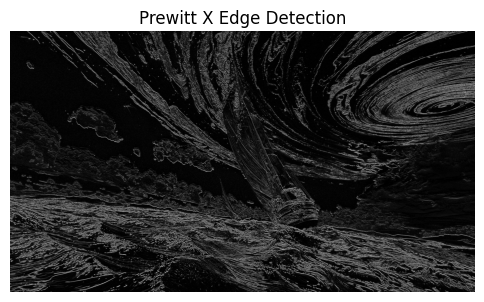

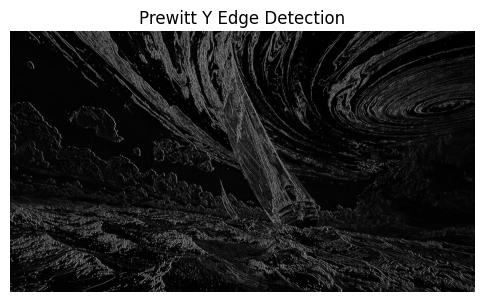

In [17]:
prewitt_x = cv2.filter2D(gray_image, -1, np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]]))
prewitt_y = cv2.filter2D(gray_image, -1, np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]]))
display_image(prewitt_x, "Prewitt X Edge Detection", cmap="gray")
display_image(prewitt_y, "Prewitt Y Edge Detection", cmap="gray")


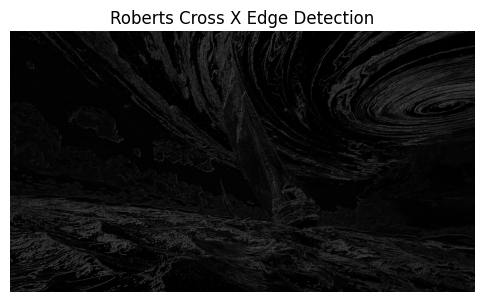

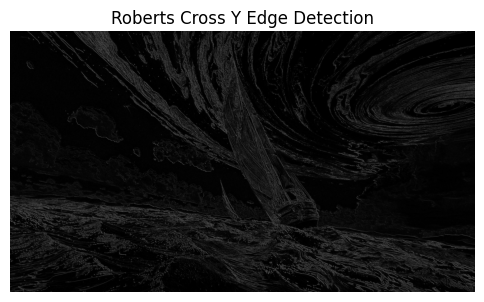

In [18]:
roberts_x = cv2.filter2D(gray_image, -1, np.array([[1, 0], [0, -1]]))
roberts_y = cv2.filter2D(gray_image, -1, np.array([[0, 1], [-1, 0]]))
display_image(roberts_x, "Roberts Cross X Edge Detection", cmap="gray")
display_image(roberts_y, "Roberts Cross Y Edge Detection", cmap="gray")


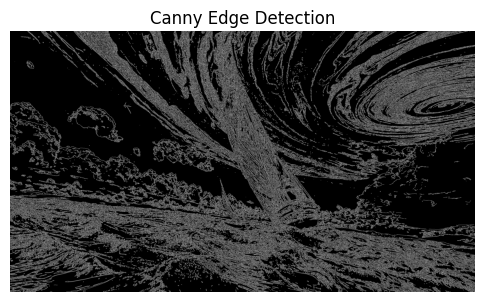

In [19]:
canny = cv2.Canny(gray_image, 100, 200)
display_image(canny, "Canny Edge Detection", cmap="gray")


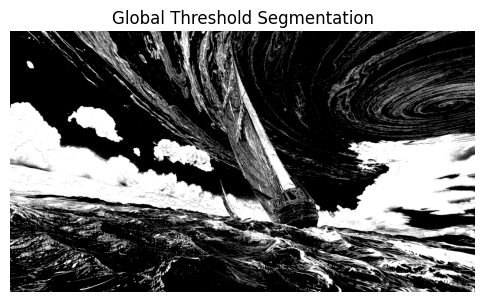

In [20]:
_, global_thresh = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
display_image(global_thresh, "Global Threshold Segmentation", cmap="gray")


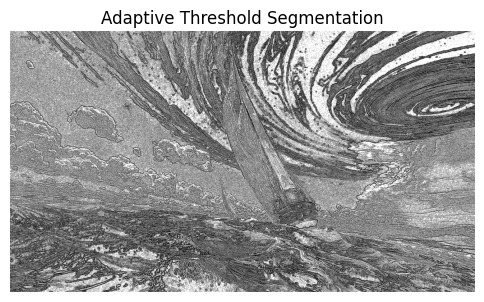

In [21]:
adaptive_thresh = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
display_image(adaptive_thresh, "Adaptive Threshold Segmentation", cmap="gray")


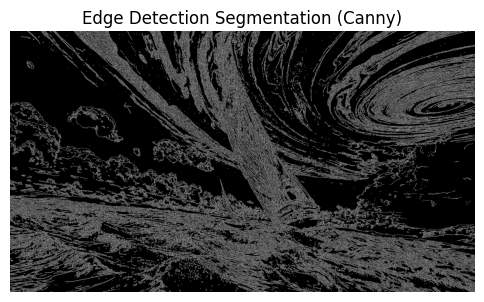

In [22]:
edges = cv2.Canny(gray_image, 100, 200)
display_image(edges, "Edge Detection Segmentation (Canny)", cmap="gray")


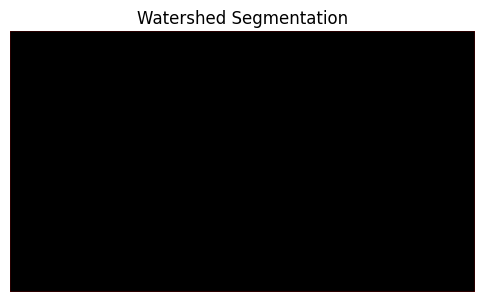

In [23]:
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(gray_image, cv2.MORPH_OPEN, kernel, iterations=2)
sure_bg = cv2.dilate(opening, kernel, iterations=3)
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)

sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)
markers = cv2.connectedComponents(sure_fg)[1]
markers = markers + 1
markers[unknown == 255] = 0
markers = cv2.watershed(image, markers)

watershed_segmentation = np.zeros_like(image)
watershed_segmentation[markers == -1] = [255, 0, 0]

display_image(watershed_segmentation, "Watershed Segmentation")
